In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn import svm
from lib import *
from svm import *
from QPslover import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
data, lable  = load_train("./data/0vs8Source.csv")
train_data, train_lable, validation_data, validation_lable = shuffleData(data, lable)
print "train data: ", train_data.shape
print "train lable: ", train_lable.shape
print "validation data: ", validation_data.shape
print "validation lable: ", validation_lable.shape

train data:  (432L, 16L)
train lable:  (432L,)
validation data:  (49L, 16L)
validation lable:  (49L,)


In [3]:
train_data, train_lable =  load_train("./data/0vs8Source.csv")
print "train data: ", train_data.shape
print "train lable: ", train_lable.shape

train data:  (481L, 16L)
train lable:  (481L,)


In [4]:
target_data, target_lable  = load_train("./data/0vs8Target.csv")
target_data, target_lable, target_v_data, target_v_lable = shuffleData(target_data, target_lable)
print "train data: ", target_data.shape
print "train lable: ", target_lable.shape
print "validation data: ", target_v_data.shape
print "validation lable: ", target_v_lable.shape

train data:  (36L, 16L)
train lable:  (36L,)
validation data:  (3L, 16L)
validation lable:  (3L,)


In [5]:
target_data, target_lable  = load_train("./data/0vs8Target.csv")
print "train data: ", target_data.shape
print "train lable: ", target_lable.shape


train data:  (39L, 16L)
train lable:  (39L,)


In [6]:
# it is 0 vs 8 problem, so divde only two class
train_lable[train_lable <= 4 ] = -1
train_lable[train_lable > 4] = 1
validation_lable[validation_lable <= 4 ] = -1
validation_lable[validation_lable > 4] = 1

In [7]:
target_lable[target_lable <= 4 ] = -1
target_lable[target_lable > 4] = 1
target_v_lable[target_v_lable <= 4 ] = -1
target_v_lable[target_v_lable > 4] = 1

In [8]:
w, b = QP_Slover(train_data, train_lable)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.146065703165
            Iterations: 20
            Function evaluations: 383
            Gradient evaluations: 20


In [9]:
pre_vali = prediction_QP(w, b, target_data)
correct_rate_only(pre_vali, target_lable)

0.8974358974358975

In [10]:
w_target, b_target = QP_Slover_transfer(target_data, target_lable, w, 70)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0299741452934
            Iterations: 16
            Function evaluations: 318
            Gradient evaluations: 16


In [11]:
pre_vali = prediction_QP(w_target, b_target, target_data)
correct_rate_only(pre_vali, target_lable)

1.0

In [12]:
test_data  = load_test("./data/0vs8TestNoLabels.csv")
print "train data: ", test_data.shape



(200L, 16L)
train data:  (200L, 16L)


In [13]:
pre_test = prediction_QP(w_target, b_target, test_data)
test_lable = np.zeros(200)
test_lable[:100] = 1
test_lable[100:] = -1

In [14]:
correct_rate_only(pre_test, test_lable)



0.91

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0293663693987
            Iterations: 31
            Function evaluations: 604
            Gradient evaluations: 31
0.905
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0293661632484
            Iterations: 29
            Function evaluations: 567
            Gradient evaluations: 29
0.905
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0293661013107
            Iterations: 29
            Function evaluations: 566
            Gradient evaluations: 29
0.905
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.029366090574
            Iterations: 27
            Function evaluations: 530
            Gradient evaluations: 27
0.905
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.029366191025
            Iterations: 28
        

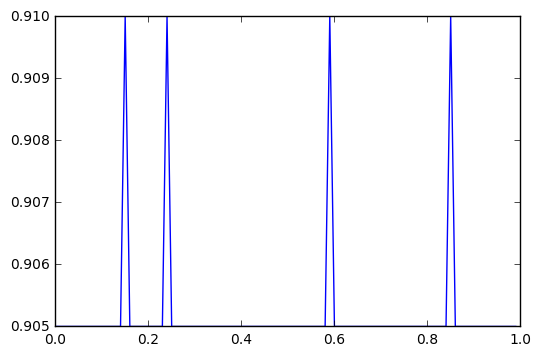

In [18]:
trace_k =[]
trace_rate =[]
best = 0
best_k = 0
for i in range(100):
    k = 0.01*i
    w_target, b_target = QP_Slover_transfer(target_data, target_lable, w, 70)
    pre_test = prediction_QP(w_target, b_target, test_data)
    rate = correct_rate_only(pre_test, test_lable)
    trace_rate.append(rate)
    trace_k.append(k)
    if best < rate:
        best = rate
        best_k = k
    print rate
plt.plot(trace_k, trace_rate)    
print "best rate = %r, best k = %i" %(best, best_k)